# K nearest neighbours with python

####
you've been given a classisfied data set from a company.They've hidden the feature column name but have given you the data and the target classes
We'll try to use knn TO create a model that directly predicts a class for a new data point based on the features

In [1]:
## import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
##get data

##Set index-col = 0 to use the first column as index

In [8]:
df =pd.read_csv("Classified Data",index_col = 0)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the variables

Because the KNN classifier predicts the class of a given test observation by idenfying the observations that are nearest to the k .if the scale of the variables matters .Any variables that are on a large scale will have a much larger effect on the distance between the observations and hence on the KNN classifier.than variables that are on a small scale

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop("TARGET CLASS",axis = 1))

StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis = 1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
## train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test ,y_train,y_test = train_test_split(scaled_features,df["TARGET CLASS"],test_size =0.30)

### using KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

In [25]:
## Predictions and evaluations

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,pred))

[[139  17]
 [ 15 129]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       156
           1       0.88      0.90      0.89       144

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [29]:
## choosing a K value

In [30]:
error_rate = []

for i in range(1,40):
    
    knn= knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

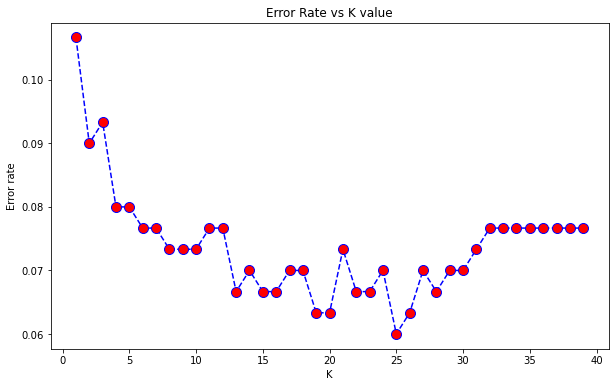

In [31]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker ='o',markerfacecolor = 'red',markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel('K')
plt.ylabel("Error rate")

 here we can see that after k>23 - k <26 the error rate just tends to hover around  0.06-0.05 let's retrain the model with that and check classisfication reports

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With k = 1")
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))


With k = 1

[[139  17]
 [ 15 129]]

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       156
           1       0.88      0.90      0.89       144

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [33]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With k = 1")
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

With k = 1

[[145  11]
 [  7 137]]

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       156
           1       0.93      0.95      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [35]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With k = 1")
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

With k = 1

[[145  11]
 [  7 137]]

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       156
           1       0.93      0.95      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

